In [1]:
from datetime import datetime as dt
time_start = dt.today()

import pandas as pd
#import main_module
%run main_module.ipynb

#import PyQt5 # для графиков в отдельных картинках
#%matplotlib qt  

%matplotlib inline

In [2]:
# # Перевод сигнала из файла .prs в рабочей директрории ASTRO в файл sig.txt
# !del "sig.txt"
# !HardDecoder.exe "C:\HOLTWIN_mian\RWORK\DATA\c0000001.prs" sig.txt 

## Чтение и подготовка

In [3]:
type_h = 'HE12BP'
#type_h = 'HE12N'

testing_record = record(r"sig.txt", holter_type=type_h, amplitude_convert = 330)

croped: 1200000


len: 1200000


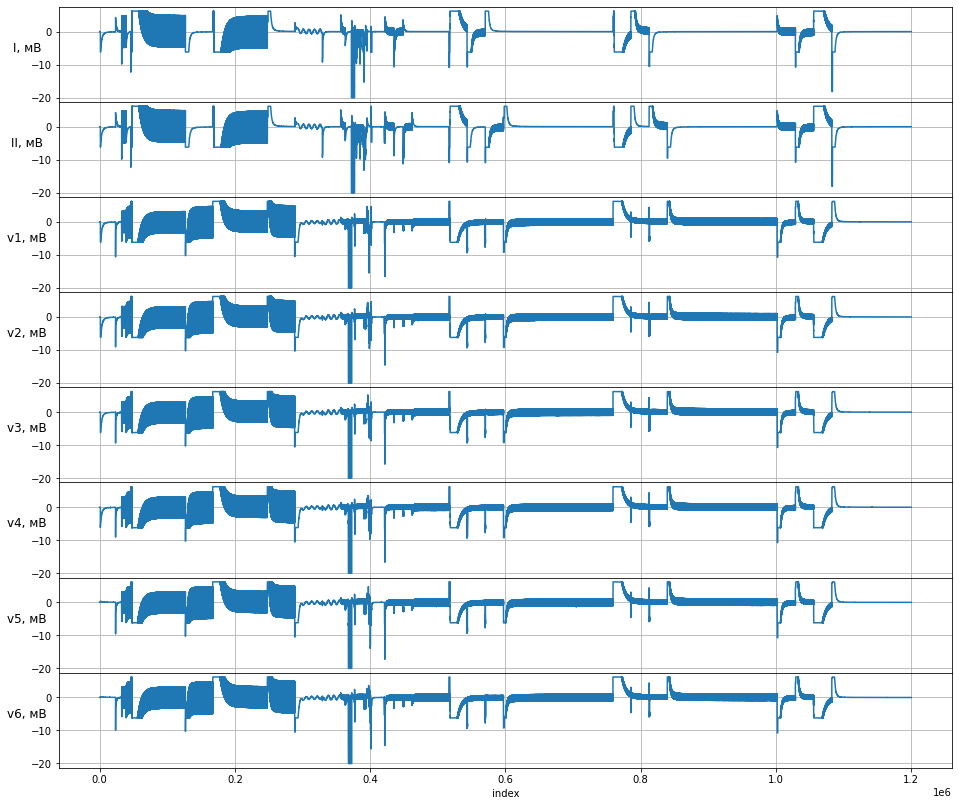

In [4]:
testing_record.plot()

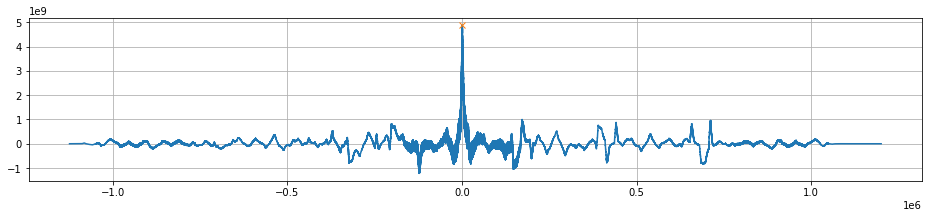

index lag: 820


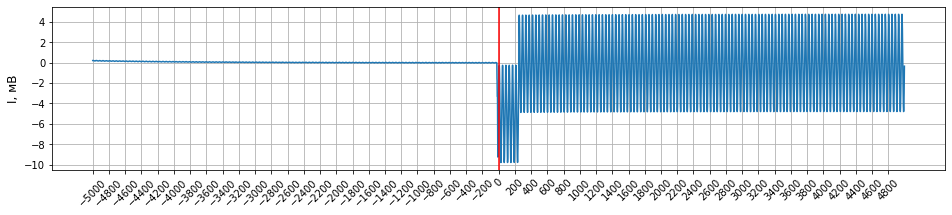

In [5]:
testing_record.find_index_lag(offset=-200, plot_corr=True)
print('index lag:' ,testing_record.index_lag)
testing_record.calibrate_index_lag()
testing_record.split_channels()

In [6]:
# testing_record.plot_segment(n_seg=35, border=0.0)

In [7]:
# # Построение участков
# i_seg = 3
# border = 0.2

# begin = testing_record.time_limits[i_seg][1] + testing_record.index_lag
# end = testing_record.time_limits[i_seg][2] + testing_record.index_lag
# print('Segment:' ,testing_record.time_limits[i_seg][0])
# testing_record.find_segment_limits(begin, end, border)

## Тесты

In [8]:
tests_rezult_pd = pd.DataFrame(columns=['Test_name','Passed_test' ,'Returned_values', 'Spikes'])

Максимальный размах записи:    0.022 мВ
Максимально допустимый размах: 0.02 мВ
[0.019, 0.02, 0.019, 0.022, 0.019, 0.016, 0.015, 0.012]


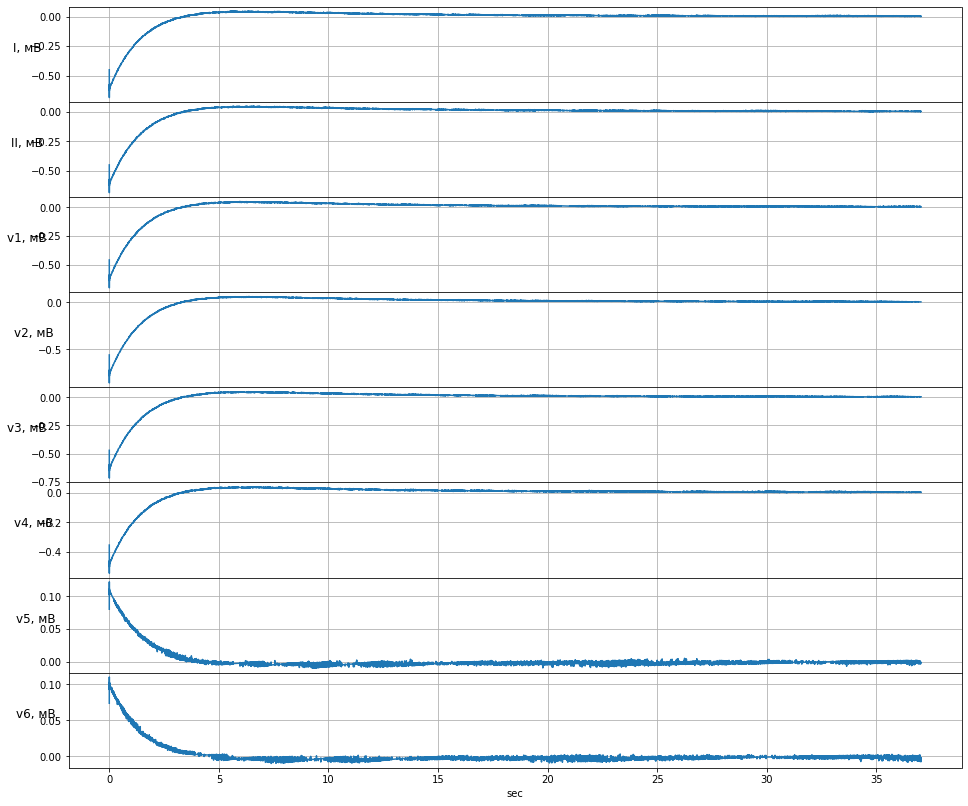

In [9]:
# Шум
values = nose_test(testing_record, max_nose = 0.02, filtred=True)
tests_rezult_pd.loc[0] = [ 'Nose test', max(values)<0.02  , values, pd.NA ]

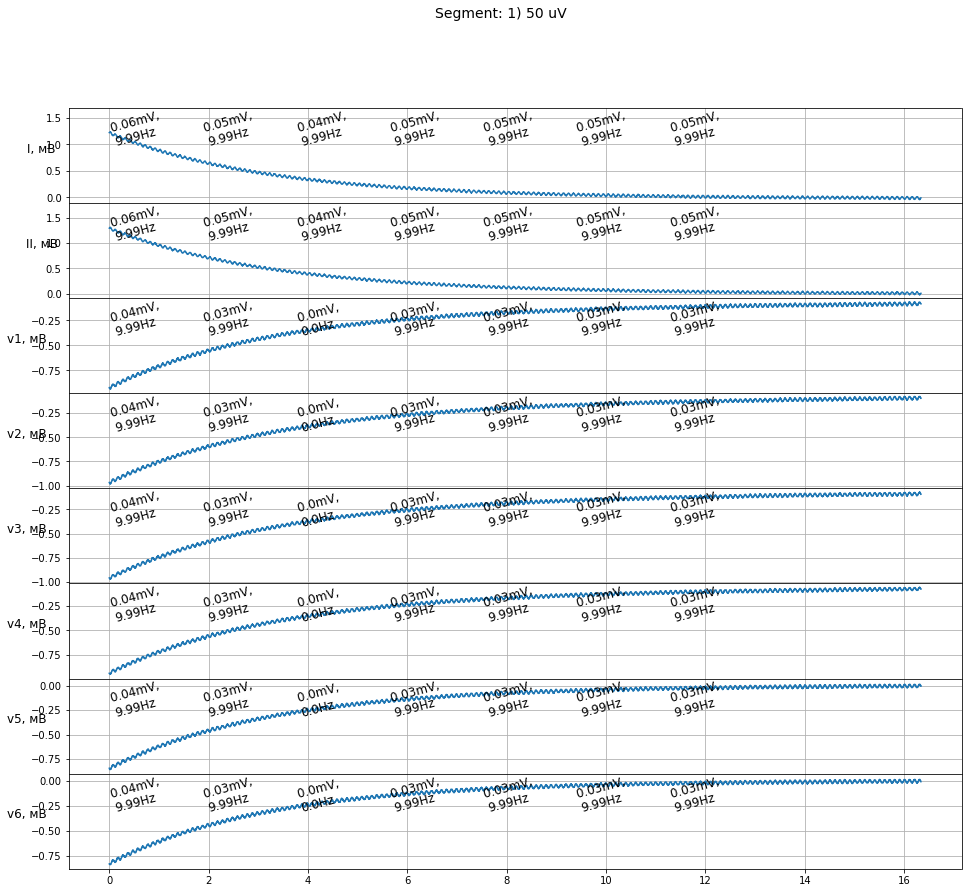

[0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]


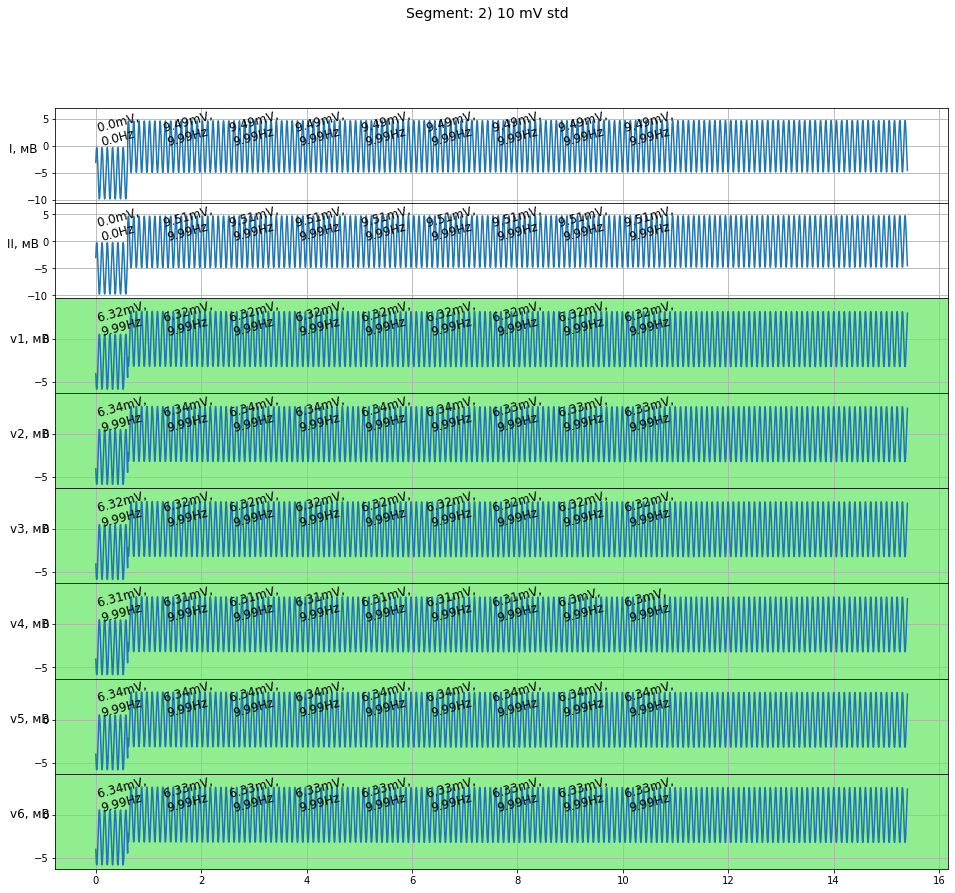

[9.49, 9.51, 6.32, 6.33, 6.32, 6.3, 6.34, 6.33]


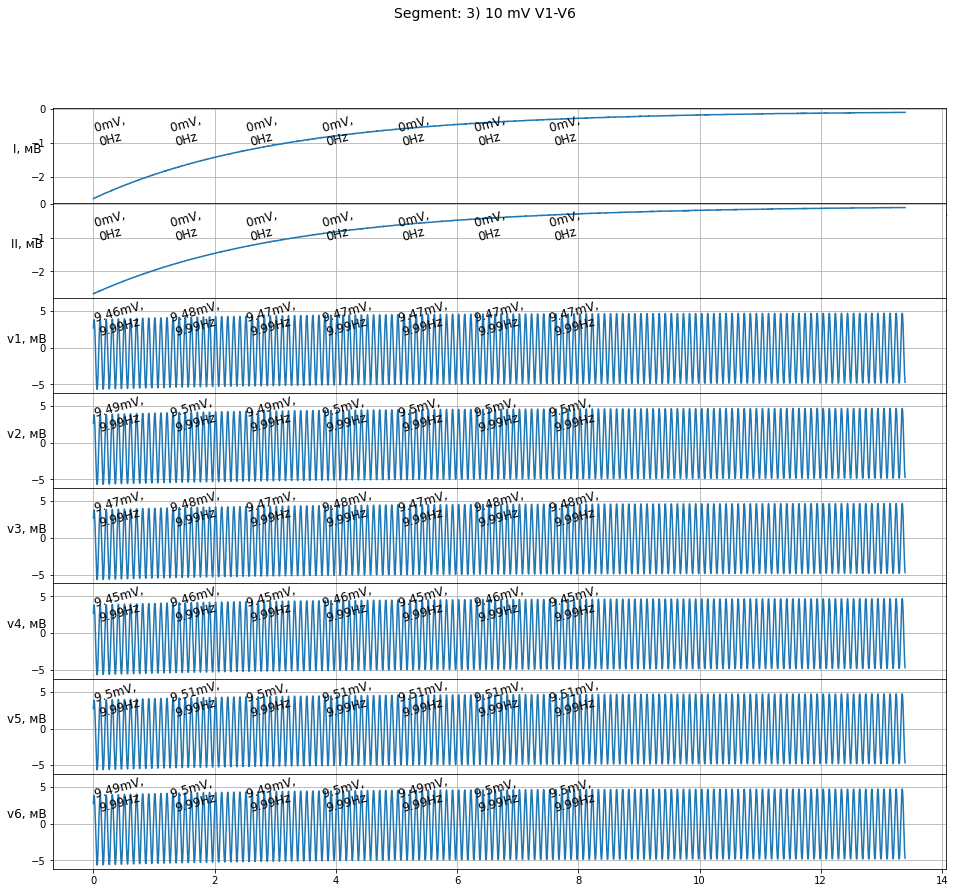

[0.0, 0.0, 9.46, 9.49, 9.47, 9.45, 9.5, 9.49]


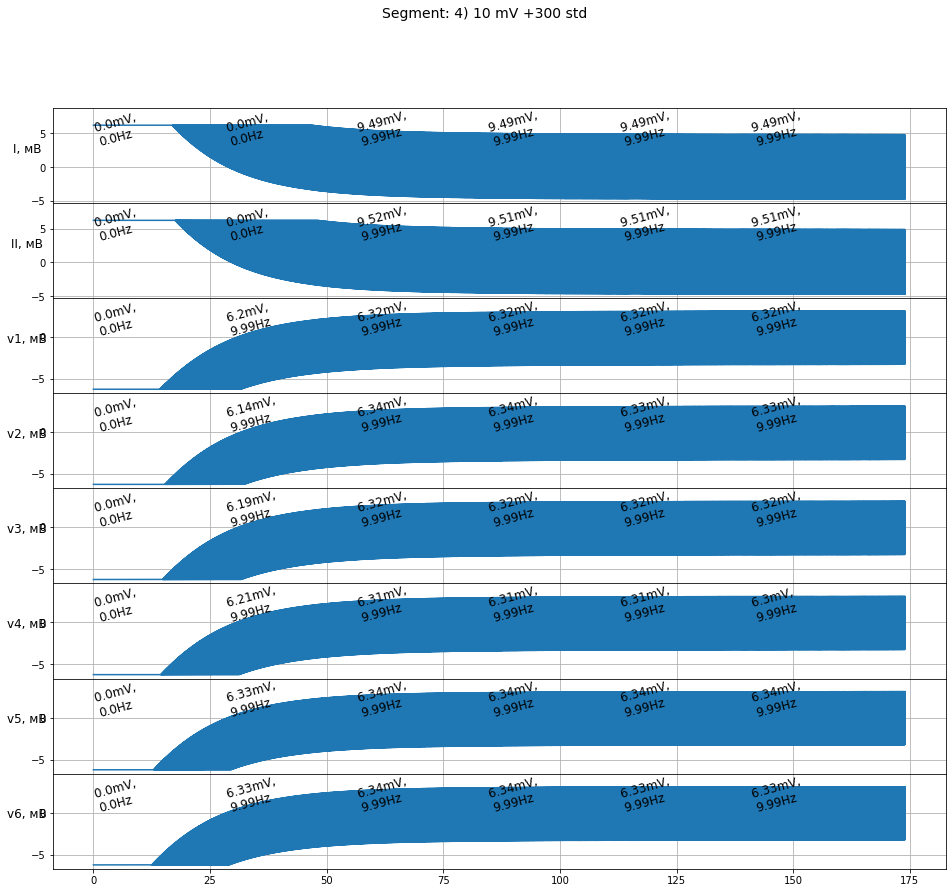

[9.49, 9.52, 6.32, 6.34, 6.32, 6.31, 6.34, 6.34]


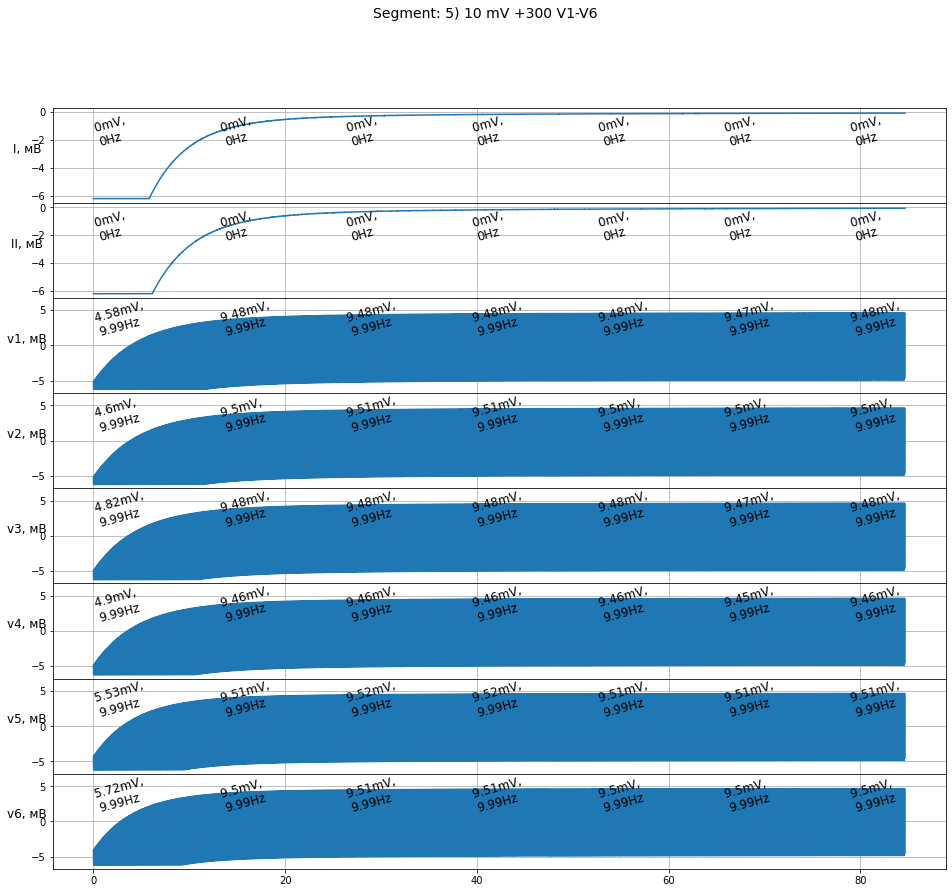

[0.0, 0.0, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]


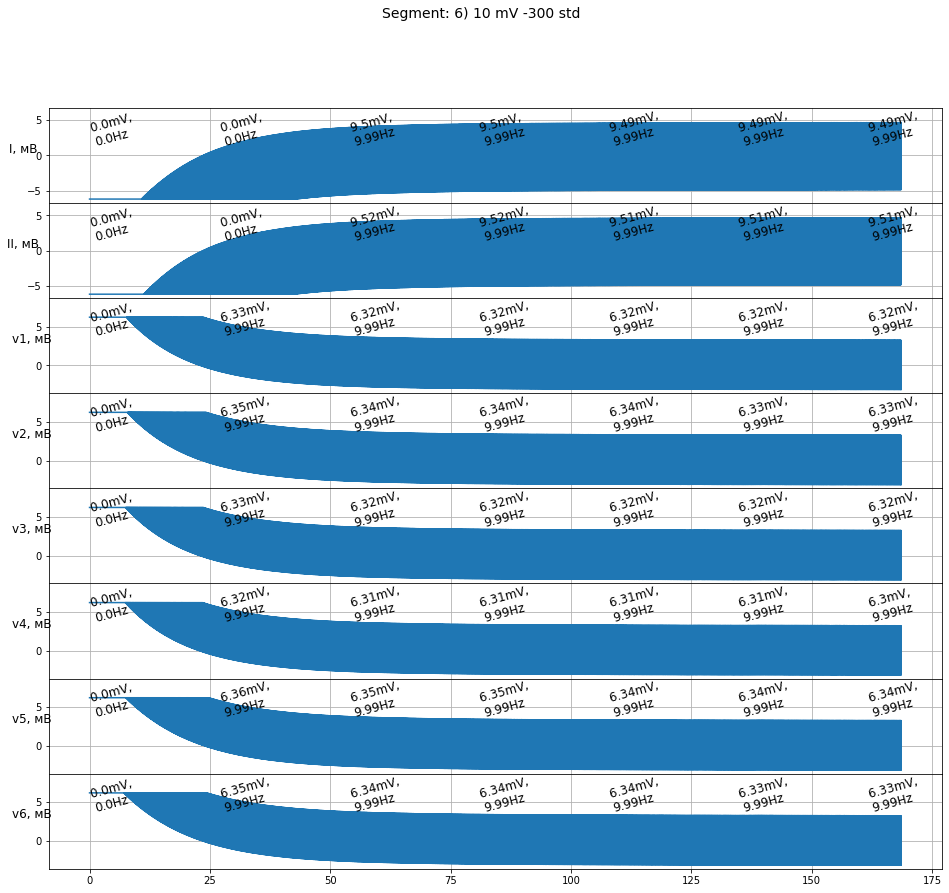

[9.5, 9.52, 6.32, 6.34, 6.32, 6.31, 6.34, 6.34]


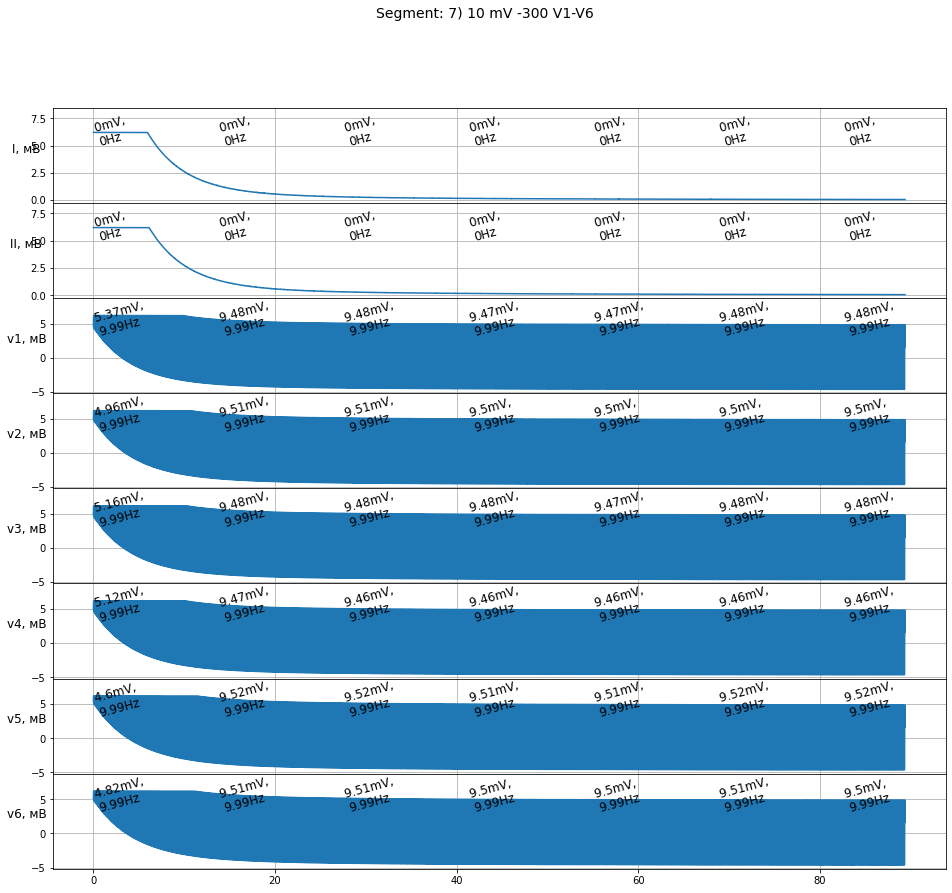

[0.0, 0.0, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]


In [10]:
# Амплитуды
values, spikes =  amplitude_test(testing_record, n_seg = 1, peaks_height= 0.03, check_spike=False)
passed_test = min(values) > 0
tests_rezult_pd.loc[1] = [ 'Amp test 50 uV', passed_test  , values, pd.NA]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 2)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 3)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[2] = [ 'Amp test 10 mV', passed_test  , values, spikes]

#------
values_std, spikes_std = amplitude_test(testing_record, n_seg = 4)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 5)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[3] = [ 'Amp test 10 mV +300 mV', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 6)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 7)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[4] = [ 'Amp test 10 mV -300 mV', passed_test  , values, spikes]


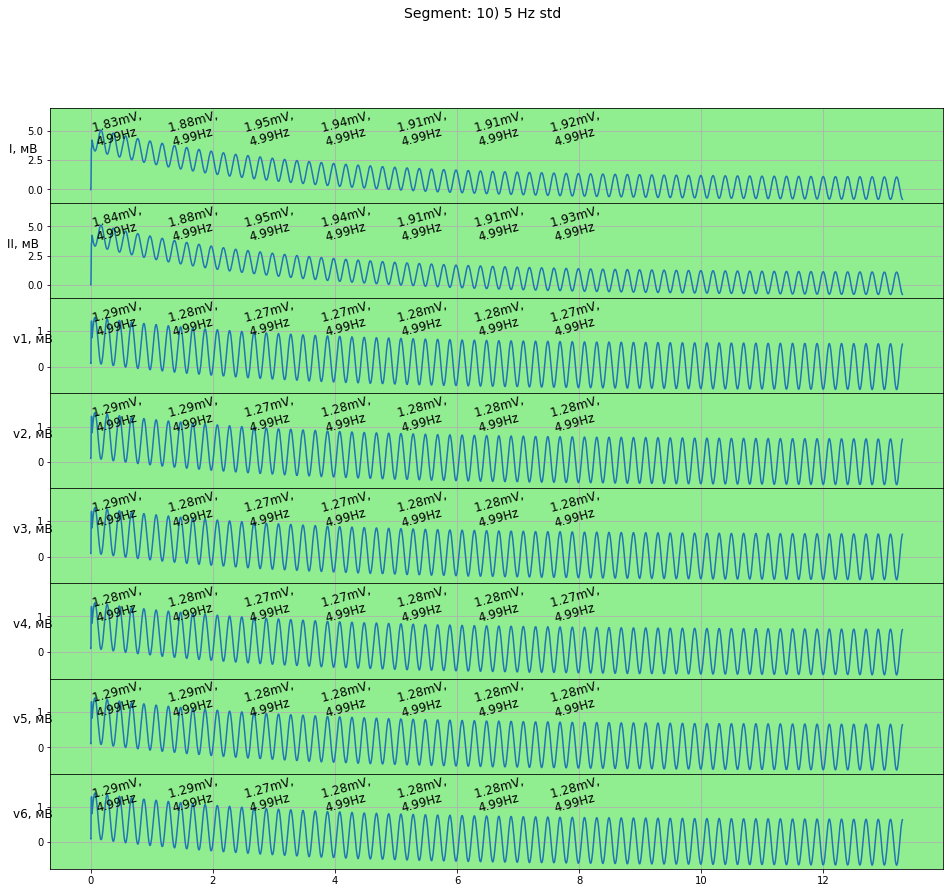

[1.92, 1.92, 1.28, 1.28, 1.28, 1.27, 1.28, 1.28]


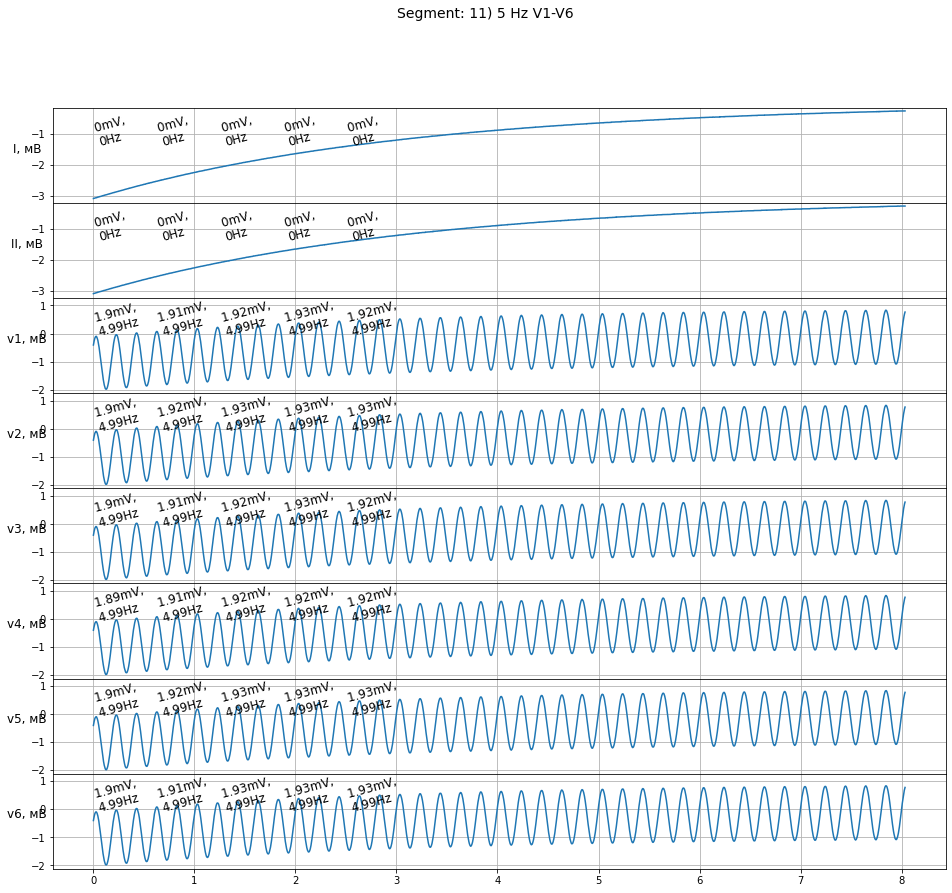

[0.0, 0.0, 1.92, 1.93, 1.92, 1.92, 1.93, 1.93]


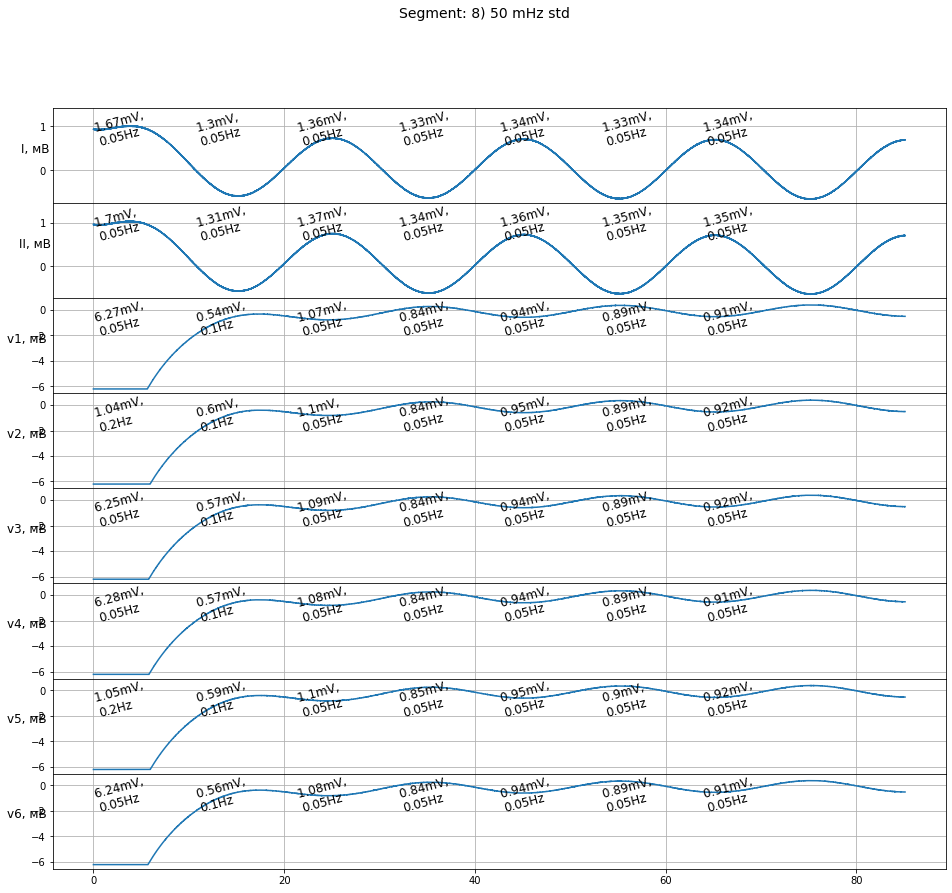

[1.34, 1.35, 0.91, 0.92, 0.92, 0.92, 0.93, 0.92]


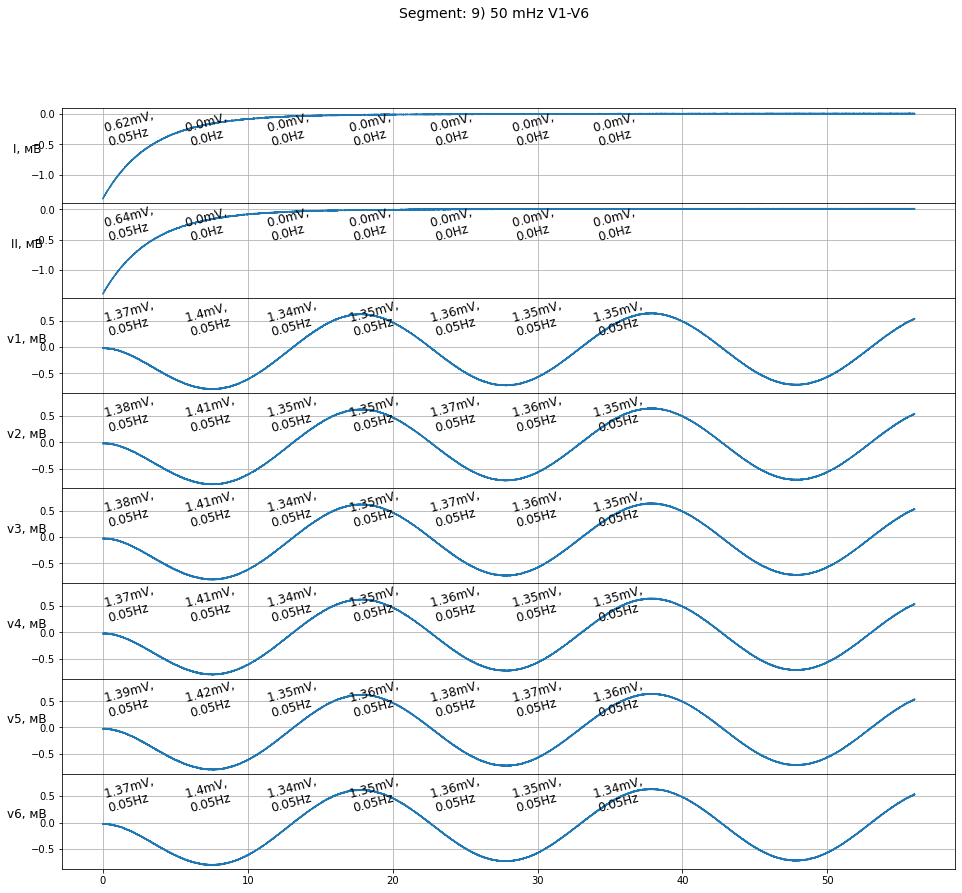

[0.0, 0.0, 1.35, 1.35, 1.35, 1.35, 1.36, 1.35]


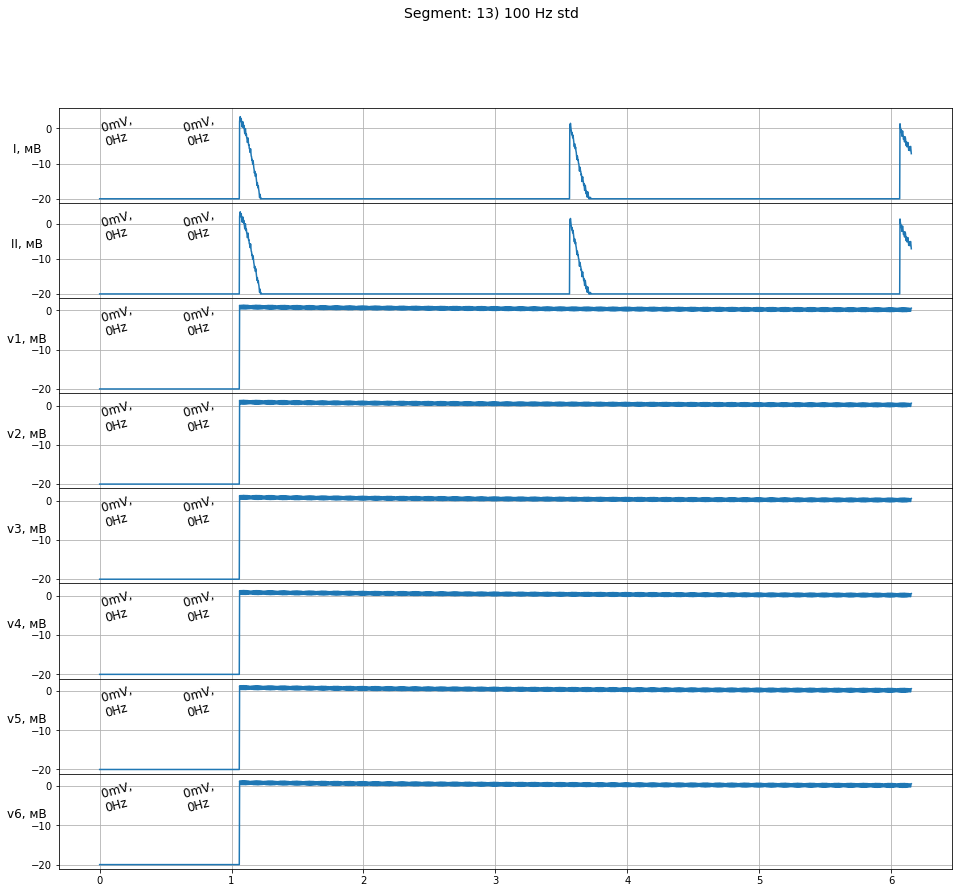

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


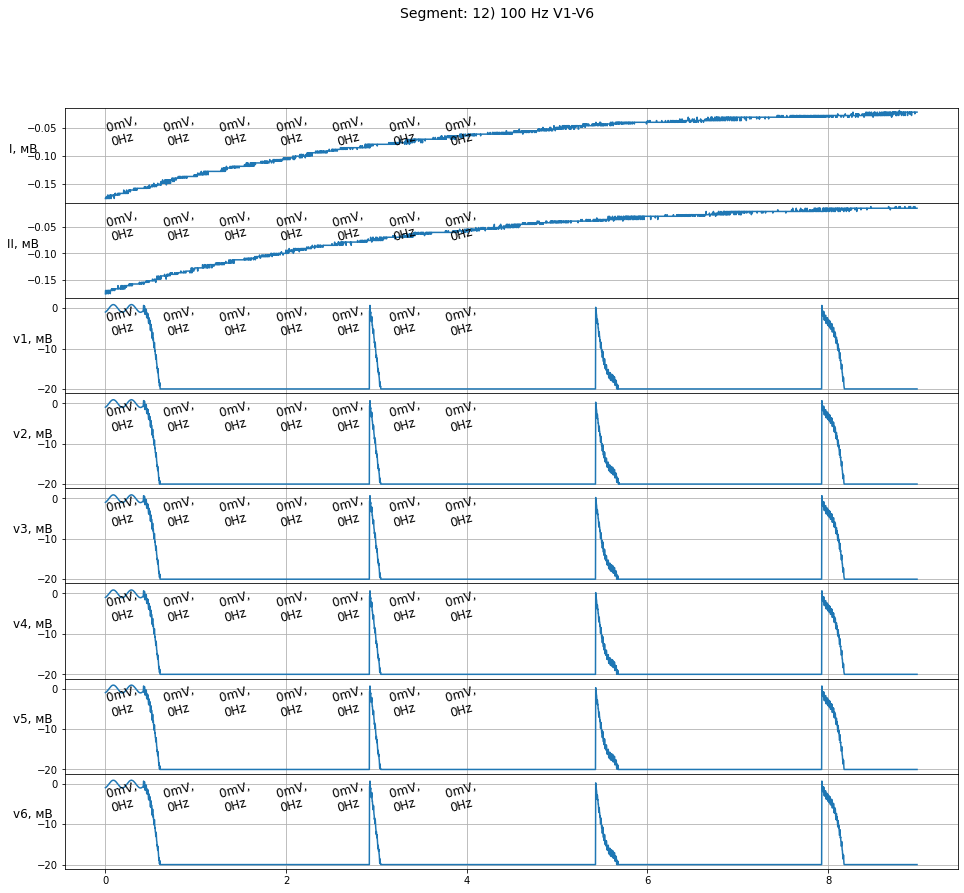

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
# Частоты
values_std, spikes_std = amplitude_test(testing_record, n_seg = 10)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 11)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 2)< 2*0.05)==1
tests_rezult_pd.loc[5] = [ 'frequency response 5 Hz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 8, window_size = 2**13)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 9, window_size = 2**13)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[6] = [ 'frequency response 50 mHz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 13, check_spike=False)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 12, check_spike=False)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[7] = [ 'frequency response 100 Hz', passed_test  , values, pd.NA]


I, max = 1.648 sec, min = 0.951 sec
II, max = 1.648 sec, min = 0.956 sec
v1, max = 1.007 sec, min = 0.956 sec
v2, max = 1.042 sec, min = 0.968 sec
v3, max = 1.007 sec, min = 0.954 sec
v4, max = 1.007 sec, min = 0.958 sec
v5, max = 1.007 sec, min = 0.954 sec
v6, max = 1.007 sec, min = 0.976 sec
Прохождение испытания: False


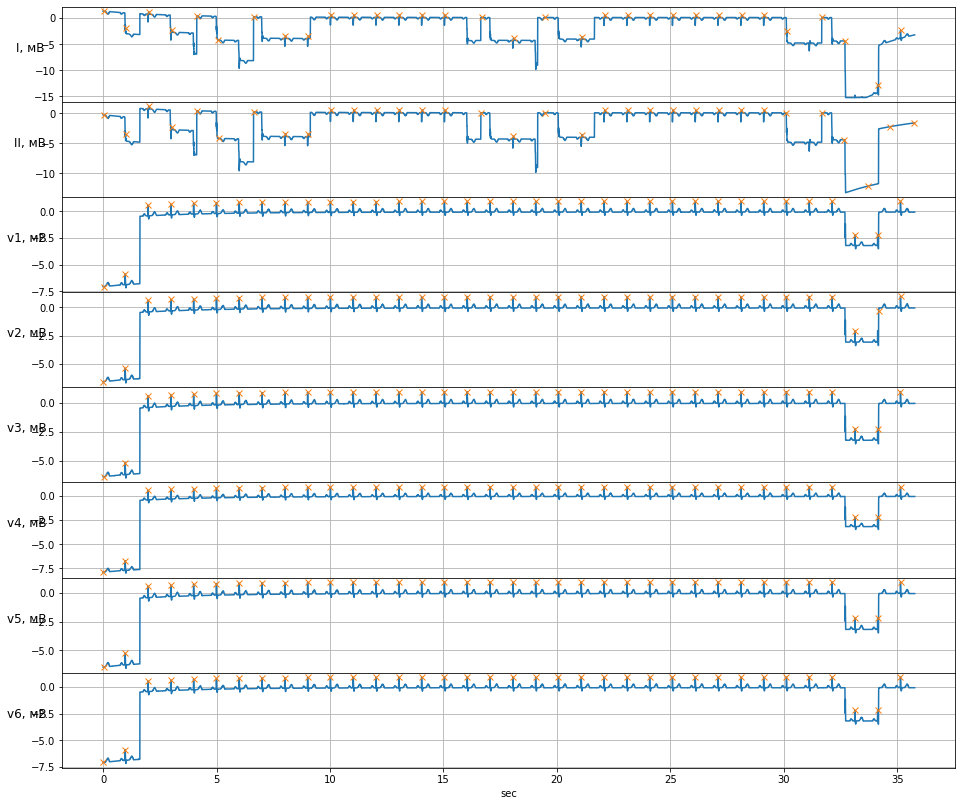

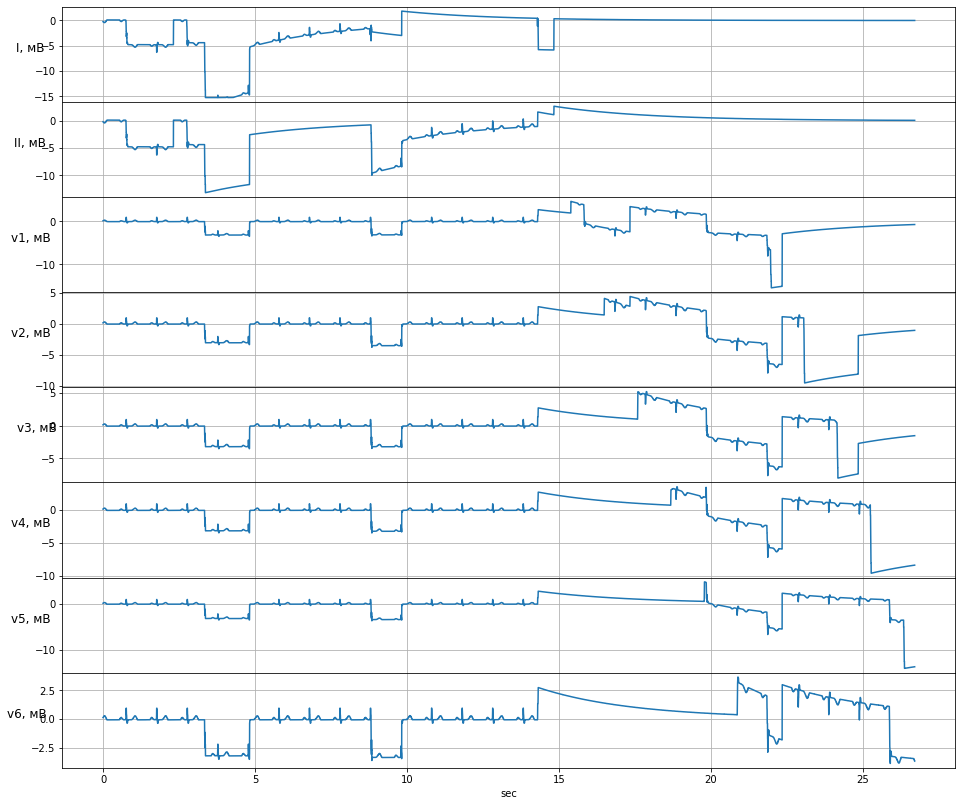

In [12]:
# ЭКГ/время
passed_test = ECG_test(testing_record, n_seg = 14)
tests_rezult_pd.loc[8] = [ 'ECG test', passed_test  , pd.NA, pd.NA]

Segment: 16) Доп. ток
I, max = 0.02 мВ, min = -0.02 мВ
II, max = 0.02 мВ, min = -0.07 мВ
v1, max = 0.02 мВ, min = -0.07 мВ
v2, max = 0.02 мВ, min = -0.2 мВ
v3, max = 0.02 мВ, min = -0.01 мВ
v4, max = 0.03 мВ, min = -0.01 мВ
v5, max = 0.03 мВ, min = -0.02 мВ
v6, max = 0.02 мВ, min = -0.01 мВ
Прохождение испытания: True


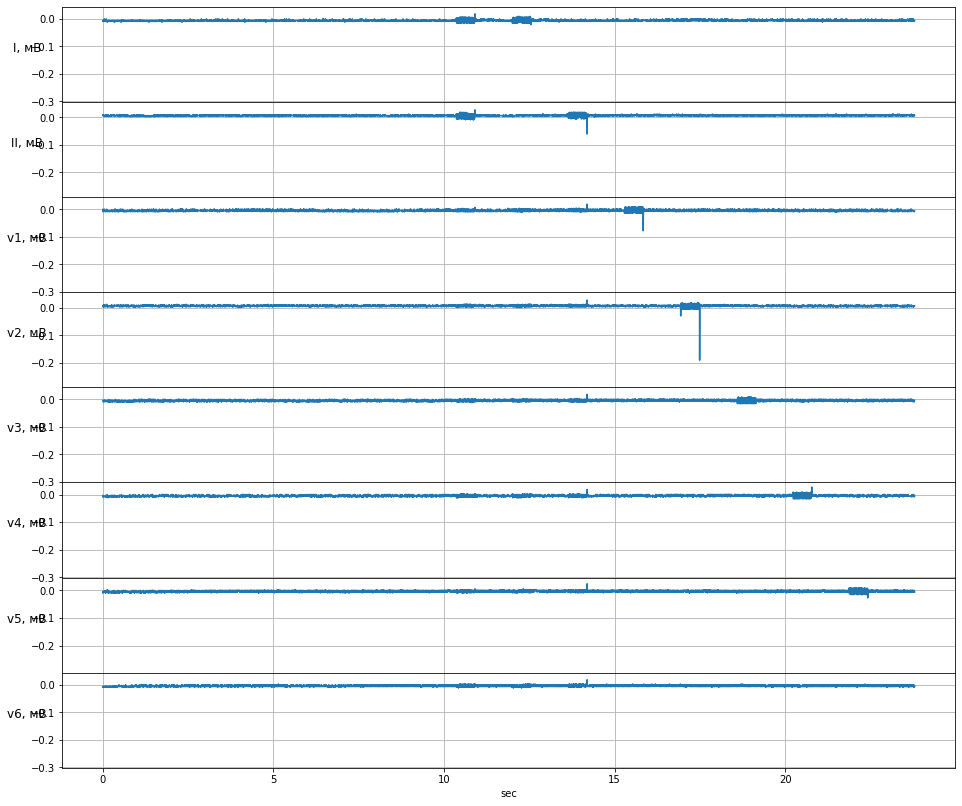

In [13]:
# Доп. ток
passed_test, values = doptok_test(testing_record, n_seg = 16)
tests_rezult_pd.loc[9] = [ 'Doptok_test', passed_test  , values, pd.NA]

Значения напряжения: [[1.902, 1.906], [1.901, 1.91], [1.904, 1.906]]
Полученные входные сопротивления: [296, 137, 731]


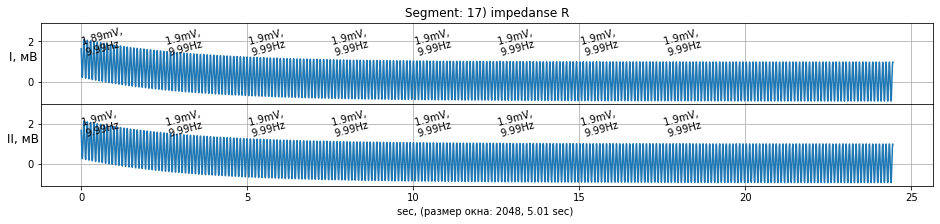

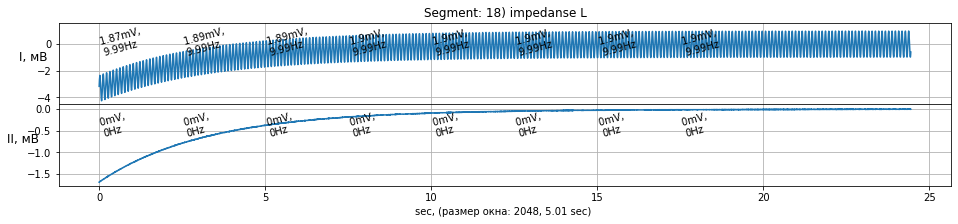

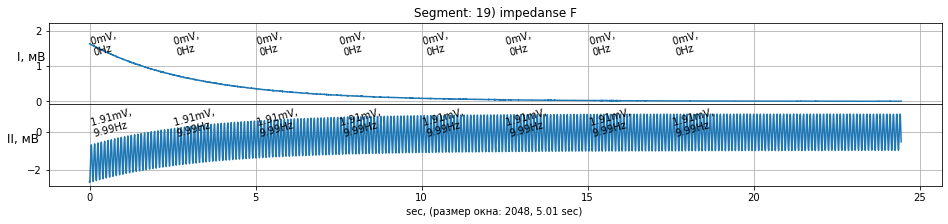

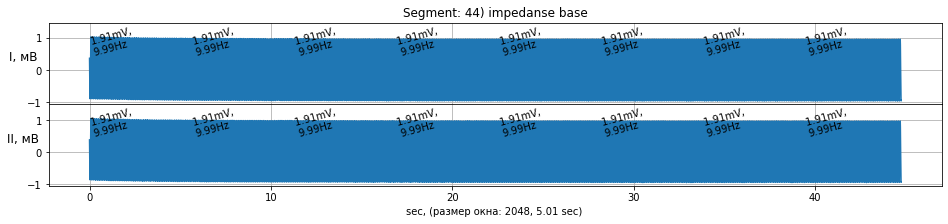

Значения напряжения: [[1.898, 1.902], [1.903, 1.907], [1.897, 1.902], [1.894, 1.899], [1.905, 1.91], [1.903, 1.907]]
Полученные входные сопротивления: [260, 296, 219, 281, 274, 308]


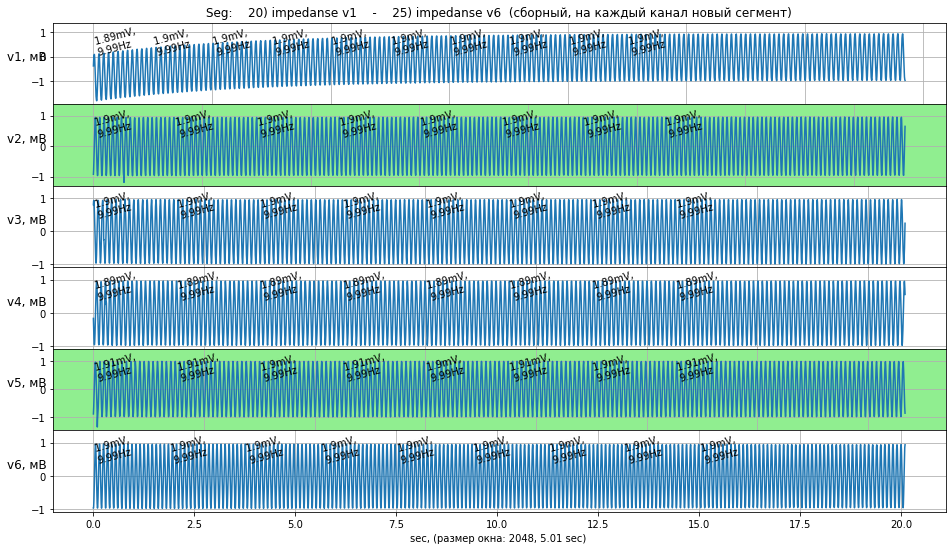

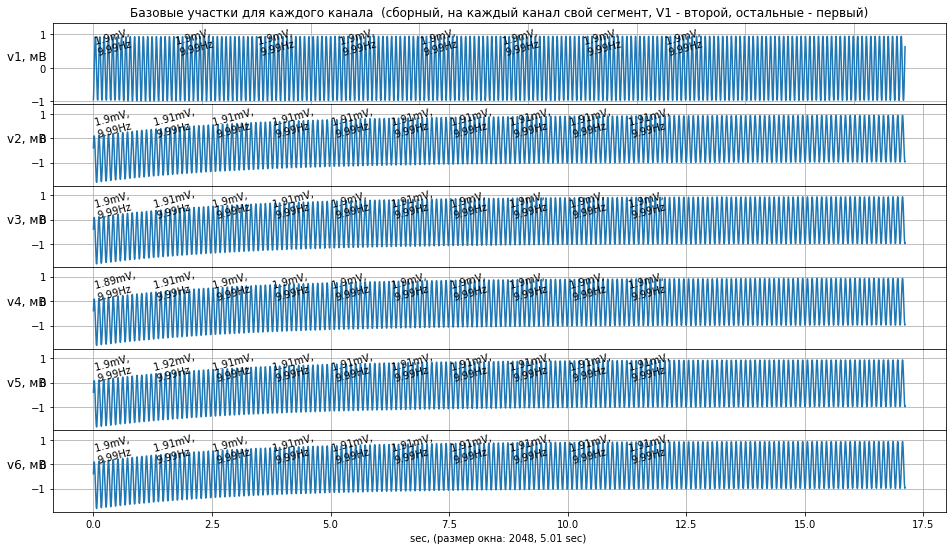

In [14]:
# Входные сопротивления
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 17, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 20, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[10] = [ 'Impedanse test', passed_test  , values, spikes]

Значения напряжения: [[1.899, 1.909], [1.903, 1.913], [1.907, 1.909]]
Полученные входные сопротивления: [121, 114, 734]


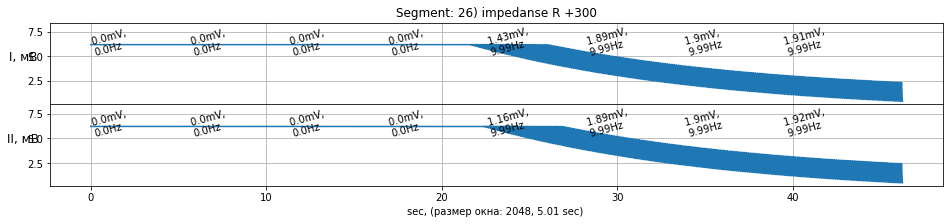

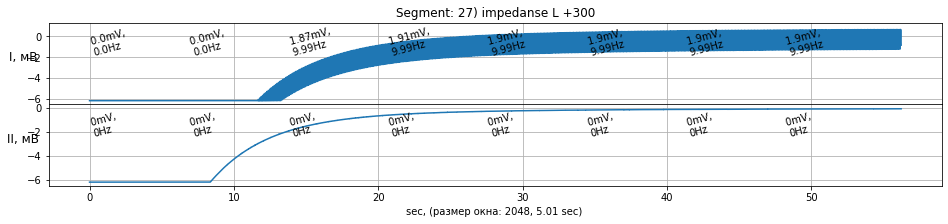

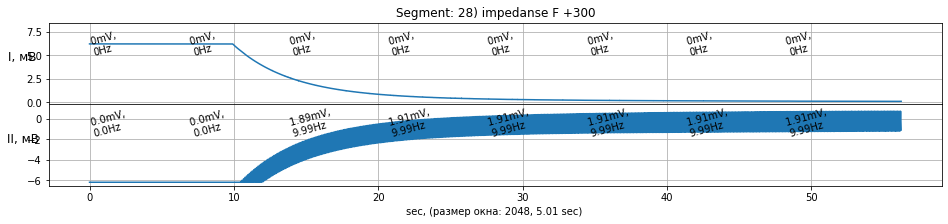

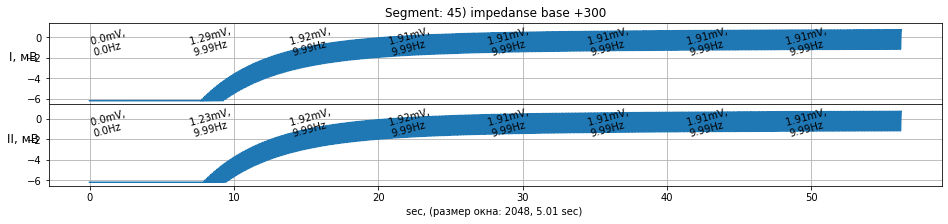

Значения напряжения: [[1.9, 1.905], [1.906, 1.91], [1.9, 1.905], [1.896, 1.901], [1.906, 1.912], [1.904, 1.91]]
Полученные входные сопротивления: [242, 301, 248, 212, 188, 200]


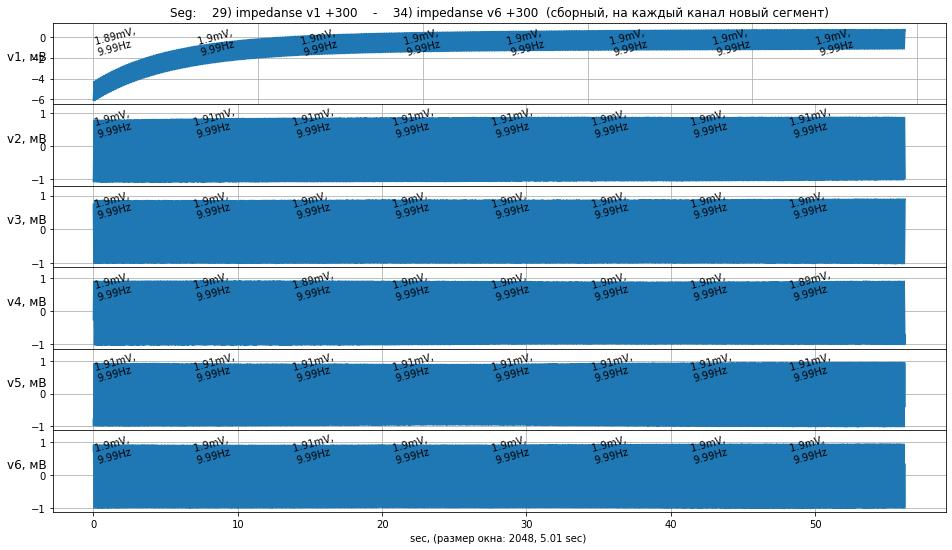

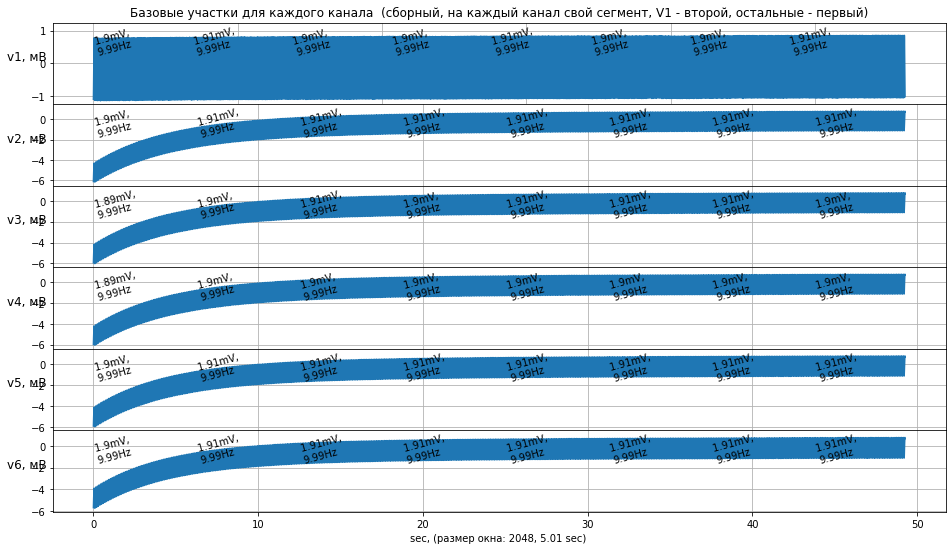

In [15]:
# Входные сопротивления +300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 26, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 29, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[11] = [ 'Impedanse test +300 mV', passed_test  , values, spikes]

Значения напряжения: [[1.908, 1.907], [1.902, 1.911], [1.907, 1.907]]
Полученные входные сопротивления: [-873, 137, -5568]


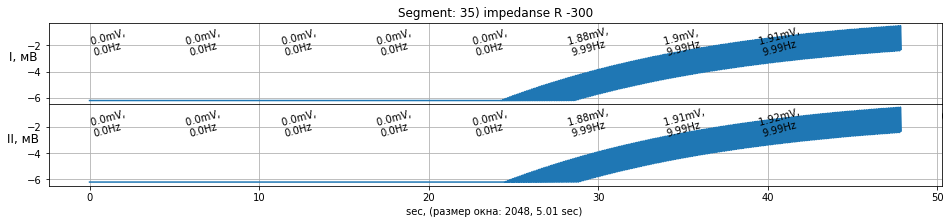

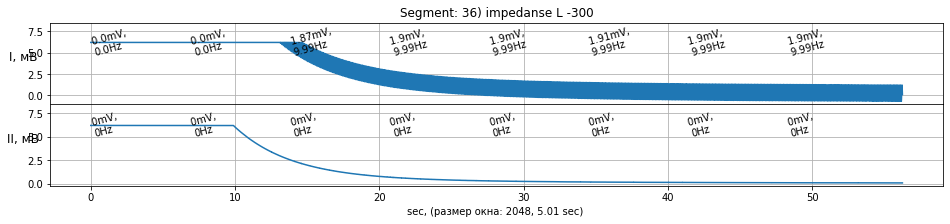

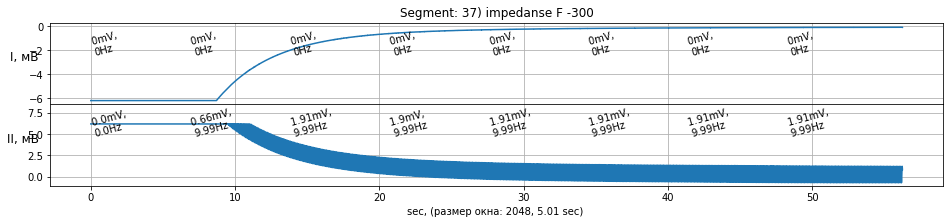

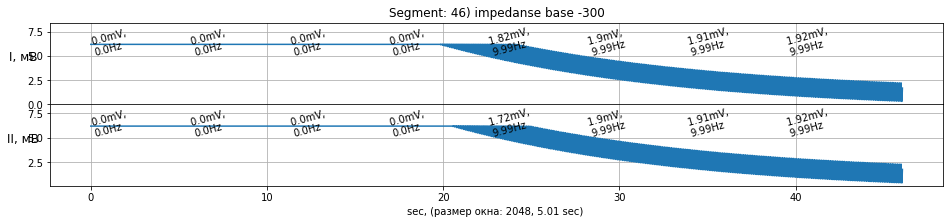

Значения напряжения: [[1.901, 1.905], [1.906, 1.91], [1.901, 1.906], [1.895, 1.902], [1.906, 1.913], [1.904, 1.911]]
Полученные входные сопротивления: [268, 252, 240, 191, 177, 170]


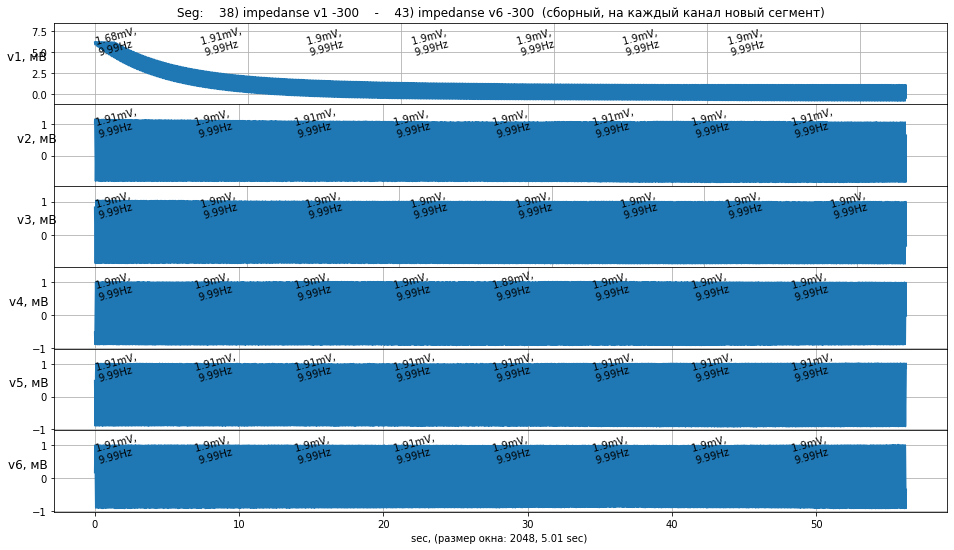

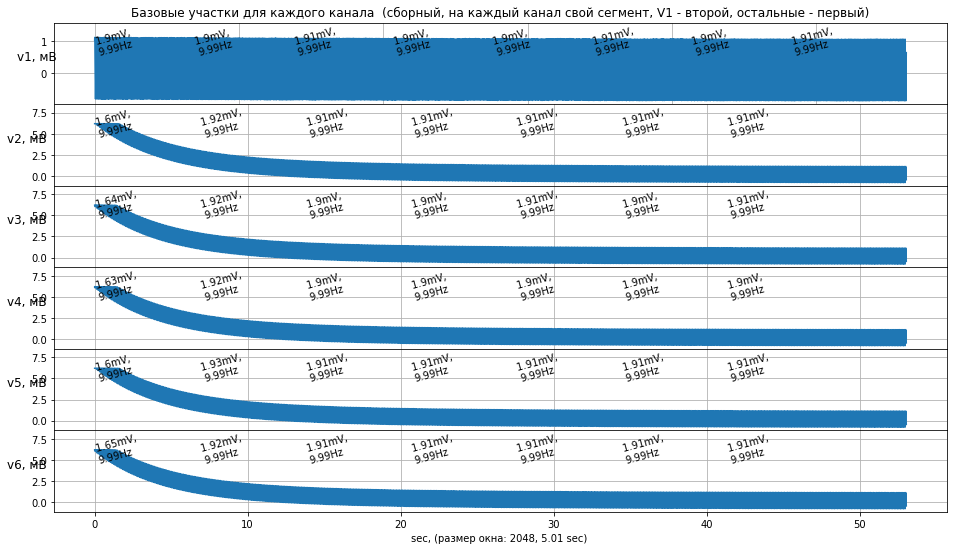

C:\Program Files\Python39-32\lib\site-packages\numpy\core\fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [27]:
# Входные сопротивления -300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 35, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 38, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[12] = [ 'Impedanse test -300 mV', passed_test  , values, spikes]

## Результаты 

In [28]:
tests_rezult_pd

Test_name  Passed_test  \
0                   Nose test        False   
1              Amp test 50 uV         True   
2              Amp test 10 mV        False   
3      Amp test 10 mV +300 mV        False   
4      Amp test 10 mV -300 mV        False   
5     frequency response 5 Hz         True   
6   frequency response 50 mHz        False   
7   frequency response 100 Hz        False   
8                    ECG test        False   
9                 Doptok_test         True   
10             Impedanse test         True   
11     Impedanse test +300 mV         True   
12     Impedanse test -300 mV         True   

                                      Returned_values Spikes  
0   [0.019, 0.02, 0.019, 0.022, 0.019, 0.016, 0.01...   <NA>  
1    [0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]   <NA>  
2     [9.49, 9.51, 9.46, 9.49, 9.47, 9.45, 9.5, 9.49]   True  
3      [9.49, 9.52, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]  False  
4       [9.5, 9.52, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]  False  
5    [1.92, 1.92, 1.92, 1.93, 1.92, 1.92, 1.93, 1.93]   True  
6    [1.34, 1.35, 1.35, 1.35, 1.35, 1.35, 1.36, 1.35]  False  
7            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   <NA>  
8                                                <NA>   <NA>  
9   [[0.02, -0.02], [0.02, -0.07], [0.02, -0.07], ...   <NA>  
10      [296, 137, 731, 260, 296, 219, 281, 274, 308]   True  
11      [121, 114, 734, 242, 301, 248, 212, 188, 200]  False  
12   [-873, 137, -5568, 268, 252, 240, 191, 177, 170]  False

---
Не прошли 

In [18]:
tests_rezult_pd[tests_rezult_pd['Passed_test'] == False]

Test_name  Passed_test  \
0                  Nose test        False   
2             Amp test 10 mV        False   
3     Amp test 10 mV +300 mV        False   
4     Amp test 10 mV -300 mV        False   
6  frequency response 50 mHz        False   
7  frequency response 100 Hz        False   
8                   ECG test        False   

                                     Returned_values Spikes  
0  [0.019, 0.02, 0.019, 0.022, 0.019, 0.016, 0.01...   <NA>  
2    [9.49, 9.51, 9.46, 9.49, 9.47, 9.45, 9.5, 9.49]   True  
3     [9.49, 9.52, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]  False  
4      [9.5, 9.52, 9.48, 9.5, 9.48, 9.46, 9.51, 9.5]  False  
6   [1.34, 1.35, 1.35, 1.35, 1.35, 1.35, 1.36, 1.35]  False  
7           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   <NA>  
8                                               <NA>   <NA>

---
Выбросы

In [19]:
tests_rezult_pd[tests_rezult_pd['Spikes'] == True]

Test_name  Passed_test  \
2            Amp test 10 mV        False   
5   frequency response 5 Hz         True   
10           Impedanse test         True   

                                     Returned_values Spikes  
2    [9.49, 9.51, 9.46, 9.49, 9.47, 9.45, 9.5, 9.49]   True  
5   [1.92, 1.92, 1.92, 1.93, 1.92, 1.92, 1.93, 1.93]   True  
10     [296, 137, 731, 260, 296, 219, 281, 274, 308]   True

21) impedanse v2
канал: v2


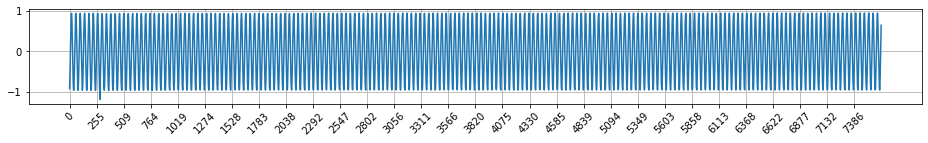

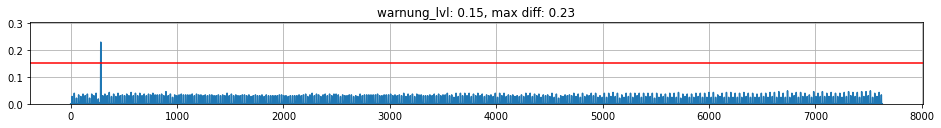

True

In [29]:
n_seg, n_ch = 21,3

print(testing_record.time_limits[n_seg][0])
print('канал:', testing_record.channels[n_ch].name)
testing_record.channels[n_ch].data_split[n_seg].plot_signal()
testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)

In [20]:
# for i in range(len(testing_record.seg_with_spike)):    
#     n_seg, n_ch = testing_record.seg_with_spike[i]

#     print(testing_record.time_limits[n_seg][0])
#     print('канал:', testing_record.channels[n_ch].name)
#     testing_record.channels[n_ch].data_split[n_seg].plot_signal()
#     testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)
#     print('-------------------------------------------------------------------------------------------')

In [21]:
testing_record.seg_with_spike

[[2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [10, 0],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 4],
 [10, 5],
 [10, 6],
 [10, 7],
 [21, 3],
 [24, 6]]

In [22]:
time_end = dt.today()
print(f'Время выполнения: {(time_end - time_start).seconds//60}:{(time_end - time_start).seconds%60}')
print('Время конца:     ' ,dt.today().strftime("%H:%M:%S"))

Время выполнения: 1:27
Время конца:      17:23:37
